In [218]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 24.10.06 과제

In [219]:
import pandas as pd
import numpy as np

In [220]:
speeds = pd.DataFrame(
    [
        ("Bird", "Falconiformes", 389.0),
        ("Bird", "Psittaciformes", 24.0),
        ("mammal", "carnivora", 80.2),
        ("mammal", "Primates", np.nan),
        ("mammal", "Carnivora", 58)
    ],
    index = ['falcon', 'parrot', 'lion', 'monkey', 'leopard'],
    columns = ['class', 'order', 'max_speed']
)
speeds
#리스트 방식으로 데이터프레임 만들기

,class,order,max_speed
falcon,Bird,Falconiformes,389.0
parrot,Bird,Psittaciformes,24.0
lion,mammal,carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [221]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df
#딕테이션 방식으로 데이터프레임 만들기(쉽다)

,A,B,C,D
0,foo,one,0.334141,0.595315
1,bar,one,-0.143307,-0.173044
2,foo,two,1.385531,-1.056990
3,bar,three,0.389814,-0.710310
4,foo,two,-0.427256,-0.184775
5,bar,two,0.394720,0.249321
6,foo,one,0.541341,-0.601952
7,foo,three,0.920114,0.381317


In [222]:
grouped = df.groupby("A")
grouped2 = df.groupby("B")
grouped3 = df.groupby(["A", "C"])

print(grouped)
#group화만 하고 연산을 하지 않나 출력이 되지 않는 듯 하다.

In [223]:
grouped3.sum()
#연산 메서드를 추가하니 정상적으로 원하는 결과를 출력해준다.

B         D
A   C                         
bar -0.143307    one -0.173044
     0.389814  three -0.710310
     0.394720    two  0.249321
foo -0.427256    two -0.184775
     0.334141    one  0.595315
     0.541341    one -0.601952
     0.920114  three  0.381317
     1.385531    two -1.056990

In [224]:
df2 = df.set_index(['A','B'])
grouped = df2.groupby(level = df2.index.names.difference(["B"]))
grouped.sum()
#multi-index를 지정 후 그 중 하나의 인덱스로만 그룹화를 시키고 싶을 때
# .index.names.difference()는 부여된 인덱스를 제외한 결과를 출력함.

,C,D
A,,
bar,0.641227,-0.634033
foo,2.753871,-0.867086


In [225]:
def get_letter_type(letter):
  if letter.lower() in 'aeiou':
    return 'vowel'
  else:
    return "consonant"

# 자음과 모음을 구분해주는 함수

In [226]:
grouped = df.T.groupby(get_letter_type)
print(grouped.count())
# T는 전치(transpose)로, 행과 열을 바꾸는 메서드이다. 선형대수학에서 아주 중요한 개념 중 하나.

           0  1  2  3  4  5  6  7
consonant  3  3  3  3  3  3  3  3
vowel      1  1  1  1  1  1  1  1


In [227]:
index = [1,2,3,1,2,3]
s = pd.Series([1,2,3,10,20,30], index = index)
s

,0
1,1
2,2
3,3
1,10
2,20
3,30


In [228]:
grouped = s.groupby(level = 0)
#level = 0은 멀티인덱스의 첫 번째 레벨을 기준으로,
#즉 이 경우 인덱스1,2,3으로 그룹화하라는 것과 같다.

In [229]:
grouped.first()
#인덱스 1,2,3이 반복되는 형태이므로 첫 번째 인덱스 1,2,3이 반환된다.

,0
1,1
2,2
3,3


In [230]:
grouped.last()
#인덱스 1,2,3의 두 번째 형태를 반환한다.

,0
1,10
2,20
3,30


In [231]:
grouped.sum()
#인덱스 1,2,3을 기준으로 각각 인덱스의 합을 반환한다.

,0
1,11
2,22
3,33


In [232]:
df2 = pd.DataFrame({"X": ["B", "B", "A", "A"], "Y": [1, 2, 3, 4]})
#데이터 프레임 만드는건 코드 일일히 치기보단 복사해 오기로 함.

df2.groupby(['X']).sum()
#그룹화 요소들의 합

,Y
X,
A,7
B,3


In [233]:
df2.groupby(['X'], sort = False).sum()

,Y
X,
B,3
A,7


In [234]:
df3 = pd.DataFrame({"X": ["A", "B", "A", "B"], "Y": [1, 4, 3, 2]})
df3.groupby("X").get_group("A")
#그룹화 한 후 특정 그룹만 가져오기

,X,Y
0,A,1
2,A,3


In [235]:
df3.groupby("X").get_group("B",)
#이 경우 ,는 아무 효과가 없다.

,X,Y
1,B,4
3,B,2


In [236]:
df_list = [[1, 2, 3], [1, None, 4], [2, 1, 3], [1, 2, 2]]
df_dropna = pd.DataFrame(df_list, columns=["a", "b", "c"])
df_dropna

,a,b,c
0,1,2.0,3
1,1,NaN,4
2,2,1.0,3
3,1,2.0,2


In [237]:
df_dropna.groupby(by = ['b']).sum()
#그룹화 할 때의 결측치는 기본값으론 무시된다.

,a,c
b,,
1.0,2,3
2.0,2,5


In [238]:
df_dropna.groupby(by = ['b'], dropna = False).sum()
#dropna를 통해 결측치도 함께 그룹화 할 수 있다.

,a,c
b,,
1.0,2,3
2.0,2,5
NaN,1,4


In [239]:
df.groupby("A").groups
#각 그룹들을 볼 수 있다.

{'bar': [1, 3, 5], 'foo': [0, 2, 4, 6, 7]}

In [240]:
df.T.groupby(get_letter_type).groups
#아까 만든 모음/자음 분류 함수

{'consonant': ['B', 'C', 'D'], 'vowel': ['A']}

In [241]:
grouped = df.groupby(["A", "B"])
grouped.groups

{('bar', 'one'): [1], ('bar', 'three'): [3], ('bar', 'two'): [5], ('foo', 'one'): [0, 6], ('foo', 'three'): [7], ('foo', 'two'): [2, 4]}

In [242]:
len(grouped)
#len함수로 그룹의 개수를 볼 수 있다.

6

In [243]:
#random.normal 은 각각 평균과 표준편차를 받아 랜덤하게 생성해주는 넘파이 메서드.
np.random.seed(1234)
n = 10
weight = np.random.normal(166, 20, size=n)
height = np.random.normal(60,10, size = n)
time = pd.date_range("1/1/2000", periods=n) #시작일과 길이를 지정.
gender = np.random.choice(["male", "female"], size=n) #랜덤하게 선택.
df = pd.DataFrame(
    {"height": height, "weight": weight, "gender": gender}, index=time
)

df

,height,weight,gender
2000-01-01,71.500357,175.428703,female
2000-01-02,69.919460,142.180486,male
2000-01-03,69.533241,194.654139,female
2000-01-04,39.787452,159.746962,male
2000-01-05,56.659226,151.588225,female
2000-01-06,60.021184,183.743259,male
2000-01-07,64.054534,183.191768,female
2000-01-08,62.890919,153.269530,female
2000-01-09,73.211582,166.313927,female
2000-01-10,44.530944,121.146301,female


In [244]:
gb = df.groupby("gender")
gb.mean()

,height,weight
gender,,
female,63.197258,163.656085
male,56.576032,161.890236


gb.agg        gb.boxplot    gb.cummin     gb.describe   gb.filter     gb.get_group  gb.height     gb.last       gb.median     gb.ngroups    gb.plot       gb.rank       gb.std        gb.transform
gb.aggregate  gb.count      gb.cumprod    gb.dtype      gb.first      gb.groups     gb.hist       gb.max        gb.min        gb.nth        gb.prod       gb.resample   gb.sum        gb.var
gb.apply      gb.cummax     gb.cumsum     gb.fillna     gb.gender     gb.head       gb.indices    gb.mean       gb.name       gb.ohlc       gb.quantile   gb.size       gb.tail       gb.weight...

등등 사용할 수있는 메서드가 많다.

In [245]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])

s = pd.Series(np.random.randn(8), index=index)
s

#np.random.randn()은 정규분포에서 랜덤하게 수 가져오기 함수.
#멀티인덱스 처리를 해 주자.

first  second
bar    one      -0.660441
       two       1.041086
baz    one       1.053175
       two       0.194295
foo    one       1.358352
       two      -0.286942
qux    one       0.441438
       two      -0.769873
dtype: float64

In [246]:
grouped = s.groupby(level=0)
#level = 0이니,멀티 인덱스 중 첫 번째인 'first' 인덱스를 기준으로 그룹화 할 것이다.

grouped.sum()

,0
first,
bar,0.380645
baz,1.247470
foo,1.071410
qux,-0.328434


In [247]:
s.groupby(level="second").sum()
#이번엔 'second' 인덱스를 기준으로 그룹화 할 것이다.


,0
second,
one,2.192524
two,0.178566


In [248]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["doo", "doo", "bee", "bee", "bop", "bop", "bop", "bop"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second", "third"])

s = pd.Series(np.random.randn(8), index=index)

s
#3중인덱스 데이터프레임.

first  second  third
bar    doo     one     -0.974568
               two      0.709007
baz    bee     one     -0.105783
               two      0.776776
foo    bop     one      0.913952
               two      1.689121
qux    bop     one     -0.591660
               two      0.043156
dtype: float64

In [249]:
s.groupby(["first", "second"]).sum()
#멀티인덱스일 때 다수의 인덱스로 그룹화도 가능.

,,0
first,second,
bar,doo,-0.265561
baz,bee,0.670993
foo,bop,2.603073
qux,bop,-0.548504


In [250]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]


index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])

df = pd.DataFrame({"A": [1, 1, 1, 1, 2, 2, 3, 3], "B": np.arange(8)}, index=index)

df

A  B
first second      
bar   one     1  0
      two     1  1
baz   one     1  2
      two     1  3
foo   one     2  4
      two     2  5
qux   one     3  6
      two     3  7

In [251]:
df.groupby([pd.Grouper(level = 1), "A"]).sum()
df.groupby([pd.Grouper(level = "second"), "A"]).sum()
#멀티인덱스일 때 두 번째 인덱스와 A열로 그룹화를 함. -> 인덱스와 열의 복합적 그룹화도 가능하다.
#이때 사용되는 메서드가 pd.Grouper()에는 인덱스의 번호와 문자 둘 다 사용 가능하다.

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [252]:
df.groupby(["second", "A"]).sum()
#사실 pd.Grouper안 써도 된다. 인덱스 위치만 이름으로 말해준다면...

B
second A   
one    1  2
       2  4
       3  6
two    1  4
       2  5
       3  7

In [253]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8), #정규분포 기준 랜덤 실수 생성
    }
)

df

,A,B,C,D
0,foo,one,-1.896101,-0.404620
1,bar,one,0.683862,2.307281
2,foo,two,-1.006551,-0.471272
3,bar,three,0.007694,-1.218701
4,foo,two,1.230841,-0.070875
5,bar,two,2.000745,-0.653945
6,foo,one,-0.672194,0.347694
7,foo,three,0.913888,-0.554826


In [254]:
grouped = df.groupby("A") #A열을 기준으로
grouped_C = grouped["C"] #C열만 빼 와서
grouped_C.sum() #모두 더하기

,C
A,
bar,2.692301
foo,-1.430118


In [255]:
grouped_D = grouped["D"]
grouped_D.apply(lambda x: x.describe())

A         
bar  count    3.000000
     mean     0.144878
     std      1.893866
     min     -1.218701
     25%     -0.936323
     50%     -0.653945
     75%      0.826668
     max      2.307281
foo  count    5.000000
     mean    -0.230780
     std      0.371909
     min     -0.554826
     25%     -0.471272
     50%     -0.404620
     75%     -0.070875
     max      0.347694
Name: D, dtype: float64

In [256]:
df["C"].groupby(df["A"]).sum()
#이미 인덱싱 한 df도 원래의 df의 열을 참조하여 그룹화 할 수 있다.
#이 방법이 더 CS적으로 내부 그룹화ㅡ이 중복이 이루어지지 않아 더 효율적인 방법이다.

,C
A,
bar,2.692301
foo,-1.430118


In [257]:
grouped[["A","B"]].sum()
#이미 그룹화 할때 쓴 칼럼을 다시 호출할 수 있다.
#이 경우 문자열에 sum을 하여 문자열들이 합쳐진 상태

,A,B
A,,
bar,barbarbar,onethreetwo
foo,foofoofoofoofoo,onetwotwoonethree


In [258]:
grouped = df.groupby('A')

for name, group in grouped:
    print(name)
    print(group)

#반복문을 쓰면 그룹과 해당 그룹의 요소를 볼 수 있다.

bar
     A      B         C         D
1  bar    one  0.683862  2.307281
3  bar  three  0.007694 -1.218701
5  bar    two  2.000745 -0.653945
foo
     A      B         C         D
0  foo    one -1.896101 -0.404620
2  foo    two -1.006551 -0.471272
4  foo    two  1.230841 -0.070875
6  foo    one -0.672194  0.347694
7  foo  three  0.913888 -0.554826


In [259]:
for name, group in df.groupby(['A', 'B']):
    print(name)
    print(group)

  #여러 개의 열로 그룹화를 했을 시 출력되는 결과는 튜플로 나온다.

('bar', 'one')
     A    B         C         D
1  bar  one  0.683862  2.307281
('bar', 'three')
     A      B         C         D
3  bar  three  0.007694 -1.218701
('bar', 'two')
     A    B         C         D
5  bar  two  2.000745 -0.653945
('foo', 'one')
     A    B         C         D
0  foo  one -1.896101 -0.404620
6  foo  one -0.672194  0.347694
('foo', 'three')
     A      B         C         D
7  foo  three  0.913888 -0.554826
('foo', 'two')
     A    B         C         D
2  foo  two -1.006551 -0.471272
4  foo  two  1.230841 -0.070875


In [260]:
grouped.get_group("bar")
#그룹 관측하기.

,A,B,C,D
1,bar,one,0.683862,2.307281
3,bar,three,0.007694,-1.218701
5,bar,two,2.000745,-0.653945


In [261]:
df.groupby(["A", "B"]).get_group(("bar", "one"))
#멀티 인덱싱의 경우

,A,B,C,D
1,bar,one,0.683862,2.307281


# Aggregation
- groupby는 데이터를 모아 데이터의 차원수를 감소시키는 데에도 유용하게 사용할 수 있다.
- 가장 대표적으론, sum()등의 메서드를 통해 필요한 정보만 나오게 요약하는 것이다.

In [262]:
animals = pd.DataFrame(
    {
        "kind": ["cat", "dog", "cat", "dog"],
        "height": [9.1, 6.0, 9.5, 34.0],
        "weight": [7.9, 7.5, 9.9, 198.0],
    }
)

animals

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


In [263]:
animals.groupby(["kind"]).sum()
#종족별로의 값의 합으로 데이터의 차원 줄이기

,height,weight
kind,,
cat,18.6,17.8
dog,40.0,205.5


In [264]:
animals.groupby(["kind"], as_index = False).sum()
#인덱스 해제하기

,kind,height,weight
0,cat,18.6,17.8
1,dog,40.0,205.5


- Aghregation에 사용되는 메서드는 sum() 외에도 var(), max(), cov() - 공분산, quantile() - 사분위수, skew() - 첨도 등등 다양하다.

In [265]:
df.groupby("A")[["C", "D"]].max()
#최댓값 출력

,C,D
A,,
bar,2.000745,2.307281
foo,1.230841,0.347694


In [266]:
df.groupby(["A", "B"]).mean()
#평균 출력, 각각의 멀티인덱스에 대응.

C         D
A   B                        
bar one    0.683862  2.307281
    three  0.007694 -1.218701
    two    2.000745 -0.653945
foo one   -1.284147 -0.028463
    three  0.913888 -0.554826
    two    0.112145 -0.271074

In [267]:
grouped = df.groupby(["A", "B"])
grouped.size()
#그룹화한 것 안의 각각의 요소 크기

A    B    
bar  one      1
     three    1
     two      1
foo  one      2
     three    1
     two      2
dtype: int64

In [268]:
grouped.describe()
#기술통계

C                                                              \
          count      mean       std       min       25%       50%       75%   
A   B                                                                         
bar one     1.0  0.683862       NaN  0.683862  0.683862  0.683862  0.683862   
    three   1.0  0.007694       NaN  0.007694  0.007694  0.007694  0.007694   
    two     1.0  2.000745       NaN  2.000745  2.000745  2.000745  2.000745   
foo one     2.0 -1.284147  0.865433 -1.896101 -1.590124 -1.284147 -0.978171   
    three   1.0  0.913888       NaN  0.913888  0.913888  0.913888  0.913888   
    two     2.0  0.112145  1.582075 -1.006551 -0.447203  0.112145  0.671493   

                        D                                                    \
                max count      mean       std       min       25%       50%   
A   B                                                                         
bar one    0.683862   1.0  2.307281       NaN  2.307281  2.307281  2.307281   
    three  0.007694   1.0 -1.218701       NaN -1.218701 -1.218701 -1.218701   
    two    2.000745   1.0 -0.653945       NaN -0.653945 -0.653945 -0.653945   
foo one   -0.672194   2.0 -0.028463  0.531966 -0.404620 -0.216541 -0.028463   
    three  0.913888   1.0 -0.554826       NaN -0.554826 -0.554826 -0.554826   
    two    1.230841   2.0 -0.271074  0.283124 -0.471272 -0.371173 -0.271074   

                               
                75%       max  
A   B                          
bar one    2.307281  2.307281  
    three -1.218701 -1.218701  
    two   -0.653945 -0.653945  
foo one    0.159615  0.347694  
    three -0.554826 -0.554826  
    two   -0.170975 -0.070875

In [269]:
ll = [['foo', 1], ['foo', 2], ['foo', 2], ['bar', 1], ['bar', 1]]

df4 = pd.DataFrame(ll, columns=["A", "B"])

df4

,A,B
0,foo,1
1,foo,2
2,foo,2
3,bar,1
4,bar,1


In [270]:
df4.groupby("A")["B"].nunique()
#중복되지 않는 값(unique)의 갯수를 세서 반환하는 메서드

,B
A,
bar,1
foo,2


- Aggregate()함수로 지금까지의메서드를 사용할 수 있다. 사용할 함수 명을 괄호 안에 문자열로 입력하면 된다. agg로 줄여서 쓸 수도 있다.

In [271]:
grouped = df.groupby("A")
grouped[["C","D"]].aggregate("sum")
#.sum()과 그 효과가 같다.

,C,D
A,,
bar,2.692301,0.434634
foo,-1.430118,-1.153900


In [272]:
grouped = df.groupby(["A", "B"])
grouped.agg("sum")
#.agg로 줄여쓰기가 가능하다.

C         D
A   B                        
bar one    0.683862  2.307281
    three  0.007694 -1.218701
    two    2.000745 -0.653945
foo one   -2.568295 -0.056926
    three  0.913888 -0.554826
    two    0.224289 -0.542148

In [273]:
grouped = df.groupby(["A", "B"], as_index=False)
grouped.agg("sum")
#인덱스 탈락시키기.

,A,B,C,D
0,bar,one,0.683862,2.307281
1,bar,three,0.007694,-1.218701
2,bar,two,2.000745,-0.653945
3,foo,one,-2.568295,-0.056926
4,foo,three,0.913888,-0.554826
5,foo,two,0.224289,-0.542148


In [274]:
df.groupby(['A',"B"], as_index = False).agg('sum')
#한 줄로 간결하게 적을 수도 있다.

,A,B,C,D
0,bar,one,0.683862,2.307281
1,bar,three,0.007694,-1.218701
2,bar,two,2.000745,-0.653945
3,foo,one,-2.568295,-0.056926
4,foo,three,0.913888,-0.554826
5,foo,two,0.224289,-0.542148


In [275]:
df.groupby(["A", "B"]).agg("sum").reset_index()
#속성이 기억이 안나면 같은 효과의 메서드를 사용해도 된다.

,A,B,C,D
0,bar,one,0.683862,2.307281
1,bar,three,0.007694,-1.218701
2,bar,two,2.000745,-0.653945
3,foo,one,-2.568295,-0.056926
4,foo,three,0.913888,-0.554826
5,foo,two,0.224289,-0.542148


# 사용자 지정 함수로Aggregation 하기
- 아주 효과적이진 못하다. 가능하다면 내장 함수를 쓰는 것이 낫다.

In [276]:
animals

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


In [277]:
animals.groupby(["kind"])[["height"]].agg(lambda x: set(x))
# set()은 중복을 제거하고 유일한 값을 남기는 함수. 여러 개일 경우 {}의 형태로 반환.

,height
kind,
cat,"{9.1, 9.5}"
dog,"{34.0, 6.0}"


In [278]:
animals.groupby(["kind"])[["height"]].agg(lambda x: x.astype(int).sum())

,height
kind,
cat,18
dog,40


In [279]:
grouped = df.groupby("A")
grouped["C"].agg(["sum","mean","std"])
#agg를 통해 동시에 여러 개의 함수를 적용할 수도 있다.

,sum,mean,std
A,,,
bar,2.692301,0.897434,1.013544
foo,-1.430118,-0.286024,1.322999


In [280]:
grouped[["C","D"]].agg(["sum", "mean","std"])
#여러 개의 그룹화를 한 경우 다중열이 생성된다.

C                             D                    
          sum      mean       std       sum      mean       std
A                                                              
bar  2.692301  0.897434  1.013544  0.434634  0.144878  1.893866
foo -1.430118 -0.286024  1.322999 -1.153900 -0.230780  0.371909

In [281]:
(
    grouped[["C","D"]]
            .agg(["sum", "mean", "std"])
            .rename(columns = {"sum": "foo", "mean": "bar", "std": "baz"})
)
#여러개의 메서드를 쓸 때는 줄로 나눈게 읽기 좋을 때도 있다.

C                             D                    
          foo       bar       baz       foo       bar       baz
A                                                              
bar  2.692301  0.897434  1.013544  0.434634  0.144878  1.893866
foo -1.430118 -0.286024  1.322999 -1.153900 -0.230780  0.371909

In [282]:
grouped["C"].agg(['sum','sum'])
#동일한 함수를 여러 번 적으면 단순히 여러 번 출력되는데서 그친다.

,sum,sum
A,,
bar,2.692301,2.692301
foo,-1.430118,-1.430118


In [283]:
grouped["C"].agg([lambda x : x.max() - x.min(),
                  lambda x : x.median() - x.mean()])
#lambda 함수도 여러 개를 적용할 수 있다. 이때 칼럼명은 그저 fkaek_1,2,로 나온다.

,<lambda_0>,<lambda_1>
A,,
bar,1.993050,-0.213572
foo,3.126942,-0.386170


In [284]:
animals.groupby("kind").agg(
    min_height = pd.NamedAgg(column = "height", aggfunc = "min"),
    max_height = pd.NamedAgg(column = "height", aggfunc = "max"),
    average_weight = pd.NamedAgg(column = "weight", aggfunc = "mean")
)

#NamedAgg를 통해 agg의 결과로 나올 열의 이름과 대상 설정, 함수 설정을 쉽게 할 수 있다.

,min_height,max_height,average_weight
kind,,,
cat,9.1,9.5,8.90
dog,6.0,34.0,102.75


In [285]:
animals.groupby("kind").agg(
    min_height = ("height", "min"),
    max_height = ("height", "max"),
    mean_height = ("height", "mean")
)
#NamedAgg는 굳이 일일히 안 써도 튜플 형태로도 사용이 가능하다.

,min_height,max_height,mean_height
kind,,,
cat,9.1,9.5,9.3
dog,6.0,34.0,20.0


In [286]:
animals.groupby("kind").agg(
    **{
        "total weight": pd.NamedAgg(column="weight", aggfunc="sum")
    }
)

#딕셔너리 형태로도 가능하다.

,total weight
kind,
cat,17.8
dog,205.5


In [287]:
animals.groupby("kind").height.agg(
    min_height="min",
    max_height="max",
)

#특정 칼럼을 직접 메서드로 사용해서 계산할수도 있다.

,min_height,max_height
kind,,
cat,9.1,9.5
dog,6.0,34.0


In [288]:
grouped.agg({"C": "sum", "D": lambda x: np.std(x, ddof =1)})

# 딕셔너리를 활용하여 여러 열에 서로 다른 함수를 적용할 수 있다.
# std는 표준편차를 구하는 함수, ddof는 표준 편차의 자유도를 의미한다.
# delta degrees of freedom이 1인 경우 모집단의 표준편차를 모를때 추정하는 값이다.

,C,D
A,,
bar,2.692301,1.893866
foo,-1.430118,0.371909


# Transformation
- groupby를 통해서 데이터프레임을 변화하고 그 결과를 원래 데이터프레임과 동일한 형태로 반환할 수 있다. 즉, aggregation과는 달리 개별 데이터 값을 변화시킨다.
- 대표적으론 cumsum(누적합)과 diff(이전 요소와의 차이)가 쓰인다.
- 원래 데이터프레임에 이렇게 Transformation한 결과를 합치는게 대중적이다.

In [289]:
speeds

,class,order,max_speed
falcon,Bird,Falconiformes,389.0
parrot,Bird,Psittaciformes,24.0
lion,mammal,carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [290]:
grouped = speeds.groupby("class")["max_speed"]
grouped.cumsum()

#이 때 class를 기준으로 누적합을 계산하게 된다.

,max_speed
falcon,389.0
parrot,413.0
lion,80.2
monkey,NaN
leopard,138.2


In [291]:
grouped.diff()
# 원 값에 NaN이 포함된 경우 죄다 NaN으로 계산된다..

,max_speed
falcon,NaN
parrot,-365.0
lion,NaN
monkey,NaN
leopard,NaN


In [292]:
result = speeds.copy()
result['cumsum'] = grouped.cumsum()
result["diff"] = grouped.diff()
result

#원래 데이터프레임에 계산한 값 추가하기.

,class,order,max_speed,cumsum,diff
falcon,Bird,Falconiformes,389.0,389.0,NaN
parrot,Bird,Psittaciformes,24.0,413.0,-365.0
lion,mammal,carnivora,80.2,80.2,NaN
monkey,mammal,Primates,NaN,NaN,NaN
leopard,mammal,Carnivora,58.0,138.2,NaN


- bfill, cummax, cumprod등등 다양한 메서드가 존재함.
- agg와 비슷하게 transform()메서드로 지정할 수도 있다,



In [293]:
grouped = speeds.groupby("class")[["max_speed"]]
grouped.transform("cumsum")

,max_speed
falcon,389.0
parrot,413.0
lion,80.2
monkey,NaN
leopard,138.2


In [294]:
grouped.transform("sum")
#해당 class값들의 sum값을 각 행에 반환한다. -> 그러면서도 원래 df의 형태는 유지한다!

,max_speed
falcon,413.0
parrot,413.0
lion,138.2
monkey,138.2
leopard,138.2


In [295]:
index = pd.date_range("10/1/1999", periods=1100)
ts = pd.Series(np.random.normal(0.5, 2, 1100), index) #평균 0.5, 편차 2인 정규분포에서 무작위로 숫자 추출
ts = ts.rolling(window=100, min_periods=100).mean().dropna() #1100개의 데이터를 100개씩 나누어 이동평균을 계산
ts.head()

,0
2000-01-08,0.782560
2000-01-09,0.794962
2000-01-10,0.780289
2000-01-11,0.810213
2000-01-12,0.789711


In [296]:
transformed = ts.groupby(lambda x: x.year).transform(lambda x: (x - x.mean()) / x.std()) # 검정통계량을 구하는 과정
transformed.head()

# 데이터를 각 연도별 그룹 내에서 평균 0, 표준편차 1의 정규분포를 따르도록
# 정규화를 진행한다. 이로 인해 시계열 데이터의 스케일 차이로 생기는 문제 해결 및
# 모델 성능 개선에 기여할 수 있다.

,0
2000-01-08,2.168098
2000-01-09,2.270555
2000-01-10,2.149336
2000-01-11,2.396545
2000-01-12,2.227176


In [297]:
grouped = ts.groupby(lambda x: x.year)
grouped.mean()

,0
2000,0.520119
2001,0.470593
2002,0.452863


In [298]:
grouped.std()

,0
2000,0.121047
2001,0.129563
2002,0.167615


In [299]:
grouped_trans = transformed.groupby(lambda x: x.year)
grouped_trans.mean()

,0
2000,5.424321e-16
2001,-5.876578e-16
2002,6.092199e-17


In [300]:
grouped_trans.std()

,0
2000,1.0
2001,1.0
2002,1.0


<Axes: >

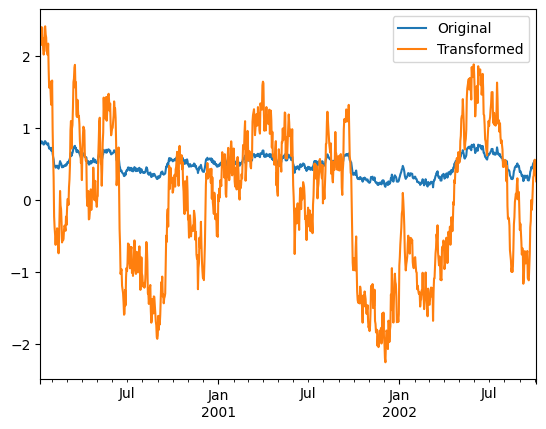

In [301]:
compare = pd.DataFrame({"Original": ts, "Transformed": transformed})
#두 데이터프레임을 합친 새로운 데이터프레임 만들기

compare.plot()
#굳이 라이브러리를 안 써도 기본 플롯은 사용할 수 있다.
#trnasformed를 쓰면 자료의 차원이 줄어들기 때문의 자료의 특성이 더욱 강하게 나타난다.
#표에서는 transformed의 변화가 아주 커 보이지만 자세히 보면 original의 등락을 따르는 걸 볼 수 있다.

In [302]:
cols = ["A", "B", "C"]

values = np.random.randn(1000, 3)

values[np.random.randint(0, 1000, 100), 0] = np.nan

values[np.random.randint(0, 1000, 50), 1] = np.nan

values[np.random.randint(0, 1000, 200), 2] = np.nan

data_df = pd.DataFrame(values, columns=cols)

data_df

,A,B,C
0,0.490374,-0.423788,-0.615812
1,0.522668,-0.518814,-1.210936
2,-0.488731,NaN,-1.173358
3,0.231692,2.257701,NaN
4,0.315204,0.852028,0.317934
...,...,...,...
995,0.233812,-1.595161,NaN
996,NaN,0.067483,-0.246357
997,-1.905594,1.274114,NaN
998,NaN,1.477911,1.418556


In [303]:
countries = np.array(["US", "UK", "GR", "JP"])

key = countries[np.random.randint(0, 4, 1000)]

grouped = data_df.groupby(key)

#key를 그대로 붙힌 후 그걸 기준으로 그룹핑한다.

grouped.count()

,A,B,C
GR,233,249,202
JP,241,248,217
UK,204,219,188
US,228,237,214


In [304]:
transformed = grouped.transform(lambda x: x.fillna(x.mean()))
#결측치 처리 -> 평균으로 대체
transformed.sum()

,0
A,-2.683095
B,17.694206
C,35.010533


In [305]:
grouped_trans = transformed.groupby(key)

grouped.mean()

,A,B,C
GR,-0.052119,0.129100,0.024978
JP,0.016851,-0.017681,-0.023525
UK,-0.065670,-0.051040,0.010546
US,0.083750,0.002312,0.127214


In [306]:
grouped_trans.mean()
#같다! transform은 그룹 평균을 바꾸진 않는다.

,A,B,C
GR,-0.052119,0.129100,0.024978
JP,0.016851,-0.017681,-0.023525
UK,-0.065670,-0.051040,0.010546
US,0.083750,0.002312,0.127214


In [307]:
grouped.count()

,A,B,C
GR,233,249,202
JP,241,248,217
UK,204,219,188
US,228,237,214


In [308]:
grouped_trans.count()
#갯수엔 차이가 있다.

,A,B,C
GR,258,258,258
JP,261,261,261
UK,227,227,227
US,254,254,254


In [309]:
grouped_trans.size()

,0
GR,258
JP,261
UK,227
US,254


In [310]:
grouped = ts.groupby(lambda x: x.year)

result = (ts - grouped.transform("mean")) / grouped.transform("std")
#정규화
result

,0
2000-01-08,2.168098
2000-01-09,2.270555
2000-01-10,2.149336
2000-01-11,2.396545
2000-01-12,2.227176
...,...
2002-09-30,0.500439
2002-10-01,0.553770
2002-10-02,0.452608
2002-10-03,0.340352


In [311]:
grouped = ts.groupby(lambda x: x.year)

result = grouped.transform("max") - grouped.transform("min")
#최댓값 - 최솟값
result

,0
2000-01-08,0.525695
2000-01-09,0.525695
2000-01-10,0.525695
2000-01-11,0.525695
2000-01-12,0.525695
...,...
2002-09-30,0.597305
2002-10-01,0.597305
2002-10-02,0.597305
2002-10-03,0.597305


In [312]:
grouped = data_df.groupby(key)

result = data_df.fillna(grouped.transform("mean"))
#결측치를 평균으로 대체
result

,A,B,C
0,0.490374,-0.423788,-0.615812
1,0.522668,-0.518814,-1.210936
2,-0.488731,0.002312,-1.173358
3,0.231692,2.257701,0.024978
4,0.315204,0.852028,0.317934
...,...,...,...
995,0.233812,-1.595161,0.127214
996,-0.052119,0.067483,-0.246357
997,-1.905594,1.274114,0.024978
998,-0.052119,1.477911,1.418556


In [313]:
df_re = pd.DataFrame({"A": [1] * 10 + [5] * 10, "B": np.arange(20)})

df_re

,A,B
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4
5,1,5
6,1,6
7,1,7
8,1,8
9,1,9


In [314]:
df_re.groupby("A").rolling(4).B.mean()
# A로 그룹핑, 4개씩으로 나누어서, B에서의 이동평균을 구한다.

A    
1  0      NaN
   1      NaN
   2      NaN
   3      1.5
   4      2.5
   5      3.5
   6      4.5
   7      5.5
   8      6.5
   9      7.5
5  10     NaN
   11     NaN
   12     NaN
   13    11.5
   14    12.5
   15    13.5
   16    14.5
   17    15.5
   18    16.5
   19    17.5
Name: B, dtype: float64

In [315]:
df_re.groupby("A").expanding().sum()
# A로 그룹핑, 누적합을 구한다. 단, expand로 각 그룹당 합을 구함.

B
A          
1 0     0.0
  1     1.0
  2     3.0
  3     6.0
  4    10.0
  5    15.0
  6    21.0
  7    28.0
  8    36.0
  9    45.0
5 10   10.0
  11   21.0
  12   33.0
  13   46.0
  14   60.0
  15   75.0
  16   91.0
  17  108.0
  18  126.0
  19  145.0

In [316]:
df_re = pd.DataFrame(
    {
        "date": pd.date_range(start="2016-01-01", periods=4, freq="W"),
        "group": [1, 1, 2, 2],
        "val": [5, 6, 7, 8],
    }
).set_index("date")

df_re

,group,val
date,,
2016-01-03,1,5
2016-01-10,1,6
2016-01-17,2,7
2016-01-24,2,8


In [317]:
df_re.groupby("group").resample("1D", include_groups=False).ffill()
#시계열을 기준으로 그룹핑할 때, resample로 하루하루 추가로 그룹화가 가능함.

val
group date           
1     2016-01-03    5
      2016-01-04    5
      2016-01-05    5
      2016-01-06    5
      2016-01-07    5
      2016-01-08    5
      2016-01-09    5
      2016-01-10    6
2     2016-01-17    7
      2016-01-18    7
      2016-01-19    7
      2016-01-20    7
      2016-01-21    7
      2016-01-22    7
      2016-01-23    7
      2016-01-24    8

# Filtration
- groupby는 원래 데이터중 원하는 것만 골라 서브셋을 만드는 기능으로도 활용할 수 있다.
- head()로 상위 몇 개를, tail로 하위 몇 개를, nth로 각 그룹마다 n번째 행만 조회할 수 있다.

In [318]:
speeds

,class,order,max_speed
falcon,Bird,Falconiformes,389.0
parrot,Bird,Psittaciformes,24.0
lion,mammal,carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [319]:
speeds.groupby("class").nth(1)
# nth(1)은 각 그룹에서 2번째(0,1)행만을 출력하게 하는 메서드.

,class,order,max_speed
parrot,Bird,Psittaciformes,24.0
monkey,mammal,Primates,NaN


In [320]:
speeds.groupby("class")[["order", "max_speed"]].nth(1)

,order,max_speed
parrot,Psittaciformes,24.0
monkey,Primates,NaN


In [321]:
product_volumes = pd.DataFrame(
    {
        "group": list("xxxxyyy"),
        "product": list("abcdefg"),
        "volume": [10, 30, 20, 15, 40, 10, 20],
    }
)


product_volumes

,group,product,volume
0,x,a,10
1,x,b,30
2,x,c,20
3,x,d,15
4,y,e,40
5,y,f,10
6,y,g,20


In [322]:
product_volumes = product_volumes.sort_values("volume", ascending=False)
#내림차순
grouped = product_volumes.groupby("group")["volume"]

cumpct = grouped.cumsum() / grouped.transform("sum")
#volume만 조회한 것의 누적합을 각 그룹의 합으로 나눔 -> cumprod, 누적 백분율과 같은 효과.
cumpct

,volume
4,0.571429
1,0.400000
2,0.666667
6,0.857143
3,0.866667
0,1.000000
5,1.000000


In [323]:
significant_products = product_volumes[cumpct <= 0.9]
# 0.9 미만만 빼옴
significant_products.sort_values(["group", "product"])

,group,product,volume
1,x,b,30
2,x,c,20
3,x,d,15
4,y,e,40
6,y,g,20


In [324]:
sf = pd.Series([1, 1, 2, 3, 3, 3])

sf.groupby(sf).filter(lambda x: x.sum() > 2)
#각 그룹의 합이 2이상인 그룹만 출력한다.

,0
3,3
4,3
5,3


In [325]:
dff = pd.DataFrame({"A": np.arange(8), "B": list("aabbbbcc")})

dff.groupby("B").filter(lambda x: len(x) > 2)
# 그룹 내의 각 크기가 3개 이상인 그룹만 필터링한다.
# b값이 a,c는 2개라 필터에 걸려서 출력되지 못한다.

,A,B
2,2,b
3,3,b
4,4,b
5,5,b


In [326]:
dff.groupby("B").filter(lambda x: len(x) > 2, dropna=False)
#단, 이 요소는 사라진게 아니라 NaN으로 처리한다.

,A,B
0,NaN,NaN
1,NaN,NaN
2,2.0,b
3,3.0,b
4,4.0,b
5,5.0,b
6,NaN,NaN
7,NaN,NaN


In [327]:
dff["C"] = np.arange(8)

dff.groupby("B").filter(lambda x: len(x["C"]) > 2)

,A,B,C
2,2,b,2
3,3,b,3
4,4,b,4
5,5,b,5


# Apply

In [328]:
df

,A,B,C,D
0,foo,one,-1.896101,-0.404620
1,bar,one,0.683862,2.307281
2,foo,two,-1.006551,-0.471272
3,bar,three,0.007694,-1.218701
4,foo,two,1.230841,-0.070875
5,bar,two,2.000745,-0.653945
6,foo,one,-0.672194,0.347694
7,foo,three,0.913888,-0.554826


In [329]:
grouped = df.groupby("A")
grouped["C"].apply(lambda x : x.describe())
#apply를 쓰면 자동으로 각 그룹안의 요소에 함수를 적용한다.

A         
bar  count    3.000000
     mean     0.897434
     std      1.013544
     min      0.007694
     25%      0.345778
     50%      0.683862
     75%      1.342303
     max      2.000745
foo  count    5.000000
     mean    -0.286024
     std      1.322999
     min     -1.896101
     25%     -1.006551
     50%     -0.672194
     75%      0.913888
     max      1.230841
Name: C, dtype: float64

In [330]:
grouped = df.groupby("A")["C"]

def f(group):
    return pd.DataFrame({'original': group,
                         'demeaned': group - group.mean()})
#그룹과 그룹의 편차를 계산하는 함수

grouped.apply(f)

original  demeaned
A                        
bar 1  0.683862 -0.213572
    3  0.007694 -0.889739
    5  2.000745  1.103311
foo 0 -1.896101 -1.610077
    2 -1.006551 -0.720528
    4  1.230841  1.516864
    6 -0.672194 -0.386170
    7  0.913888  1.199911

In [331]:
def f(x):
  return pd.Series([x, x**2], index = ["x", "x^2"])
#원래 열과 열의 제곱을 반환하는 함수

s = pd.Series(np.random.rand(5))
s

,0
0,0.887204
1,0.334371
2,0.337755
3,0.128497
4,0.954658


In [332]:
s.apply(f)

,x,x^2
0,0.887204,0.787131
1,0.334371,0.111804
2,0.337755,0.114078
3,0.128497,0.016511
4,0.954658,0.911371


In [333]:
df.groupby("A", group_keys=True).apply(lambda x: x, include_groups=False)


B         C         D
A                               
bar 1    one  0.683862  2.307281
    3  three  0.007694 -1.218701
    5    two  2.000745 -0.653945
foo 0    one -1.896101 -0.404620
    2    two -1.006551 -0.471272
    4    two  1.230841 -0.070875
    6    one -0.672194  0.347694
    7  three  0.913888 -0.554826

In [334]:
df.groupby("A", group_keys=False).apply(lambda x: x, include_groups=False)

,B,C,D
0,one,-1.896101,-0.404620
1,one,0.683862,2.307281
2,two,-1.006551,-0.471272
3,three,0.007694,-1.218701
4,two,1.230841,-0.070875
5,two,2.000745,-0.653945
6,one,-0.672194,0.347694
7,three,0.913888,-0.554826


# Numeric

In [335]:
df.groupby("A").std(numeric_only=True)
# numeric_olny를 쓰면 자동으로 numeric(숫자)형 자료만 골라서 계산한다.
# 계산 메서드 (std())같은건 항상 맨 마지막에 오는 게 더 좋다.

,C,D
A,,
bar,1.013544,1.893866
foo,1.322999,0.371909


In [339]:
from decimal import Decimal

df_dec = pd.DataFrame(
    {
        "id": [1, 2, 1, 2],
        "int_column": [1, 2, 3, 4],
        "dec_column": [
            Decimal("0.50"),
            Decimal("0.15"),
            Decimal("0.25"),
            Decimal("0.40"),
        ],
    }
)


df_dec.groupby("id")[["dec_column"]].sum()

,dec_column
id,
1,0.75
2,0.55


In [337]:
pd.Series([1, 1, 1]).groupby(
    pd.Categorical(["a", "a", "a"], categories=["a", "b"]), observed=False
).count()
# Categorial로 각 값에 a를 부여한 후 a, b의 갯수 세기
#observed = False면 관측되지 않은 값(즉, 결과가 0인 값)도 같이 출력된다.

,0
a,3
b,0


In [340]:
pd.Series([1, 1, 1]).groupby(
    pd.Categorical(["a", "a", "a"], categories=["a", "b"]), observed=True
).count()
#observed가 T라서 관측된 a값만 출력된다.

,0
a,3


# 결측치 처리

In [342]:
df = pd.DataFrame({"key": [1.0, 1.0, np.nan, 2.0, np.nan], "A": [1, 2, 3, 4, 5]})
df

,key,A
0,1.0,1
1,1.0,2
2,NaN,3
3,2.0,4
4,NaN,5


In [343]:
df.groupby("key",dropna = True).sum()
#na 제거

,A
key,
1.0,3
2.0,4


In [344]:
df.groupby("key",dropna = False).sum()
#na 유지

,A
key,
1.0,3
2.0,4
NaN,8


In [345]:
days = pd.Categorical(
    values=["Wed", "Mon", "Thu", "Mon", "Wed", "Sat"],
    categories=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
)


data = pd.DataFrame(
   {
       "day": days,
       "workers": [3, 4, 1, 4, 2, 2],
   }
)


data

,day,workers
0,Wed,3
1,Mon,4
2,Thu,1
3,Mon,4
4,Wed,2
5,Sat,2


In [346]:
data.groupby("day", observed = False, sort = True).sum()
# sort가 True라면 미리 지정한 카테고리대로 sort되어 출력됨

,workers
day,
Mon,8
Tue,0
Wed,5
Thu,1
Fri,0
Sat,2
Sun,0


In [347]:
data.groupby("day", observed = False, sort = False).sum()
# sort가 없으면 그냥 원래대로 출력된다.

,workers
day,
Wed,5
Mon,8
Thu,1
Sat,2
Tue,0
Fri,0
Sun,0


In [348]:
import datetime

df = pd.DataFrame(
    {
        "Branch": "A A A A A A A B".split(),
        "Buyer": "Carl Mark Carl Carl Joe Joe Joe Carl".split(),
        "Quantity": [1, 3, 5, 1, 8, 1, 9, 3],
        "Date": [
            datetime.datetime(2013, 1, 1, 13, 0),  #datetime은 년, 일, 월, 시, 분, 초까지 세분화가 된다.
            datetime.datetime(2013, 1, 1, 13, 5),
            datetime.datetime(2013, 10, 1, 20, 0),
            datetime.datetime(2013, 10, 2, 10, 0),
            datetime.datetime(2013, 10, 1, 20, 0),
            datetime.datetime(2013, 10, 2, 10, 0),
            datetime.datetime(2013, 12, 2, 12, 0),
            datetime.datetime(2013, 12, 2, 14, 0),
        ],
    }
)


df

,Branch,Buyer,Quantity,Date
0,A,Carl,1,2013-01-01 13:00:00
1,A,Mark,3,2013-01-01 13:05:00
2,A,Carl,5,2013-10-01 20:00:00
3,A,Carl,1,2013-10-02 10:00:00
4,A,Joe,8,2013-10-01 20:00:00
5,A,Joe,1,2013-10-02 10:00:00
6,A,Joe,9,2013-12-02 12:00:00
7,B,Carl,3,2013-12-02 14:00:00


In [350]:
df.groupby([pd.Grouper(freq = '1ME', key = "Date"), "Buyer"])[["Quantity"]].sum()
# 1ME는 freq에 의해 묶이는 단위. 내부적으로 TimeGrouper가 작동하여 그룹핑한다.

Quantity
Date       Buyer          
2013-01-31 Carl          1
           Mark          3
2013-10-31 Carl          6
           Joe           9
2013-12-31 Carl          3
           Joe           9

In [352]:
df = df.set_index("Date")

df["Date"] = df.index + pd.offsets.MonthEnd(2)

df.groupby([pd.Grouper(freq = "6ME", key = "Date"), "Buyer"])[["Quantity"]].sum()

Quantity
Date       Buyer          
2013-02-28 Carl          1
           Mark          3
2014-02-28 Carl          9
           Joe          18

In [354]:
df.groupby([pd.Grouper(freq = "6ME", level = "Date"), "Buyer"])[["Quantity"]].sum()
#key 대신 level을 사용해도 된다.

Quantity
Date       Buyer          
2013-01-31 Carl          1
           Mark          3
2014-01-31 Carl          9
           Joe          18

In [355]:
df = pd.DataFrame([[1, 2], [1, 4], [5, 6]], columns=["A", "B"])

df

,A,B
0,1,2
1,1,4
2,5,6


In [357]:
g = df.groupby("A")
g.head(1)

,A,B
0,1,2
2,5,6


In [358]:
g.tail(1)

,A,B
1,1,4
2,5,6


In [360]:
df = pd.DataFrame([[1, np.nan], [1, 4], [5, 6]], columns=["A", "B"])

g = df.groupby("A")
#그룹화를 A로 했기 떄문에 행은 1,5로 그룹화 된 상태

g.nth(0)
#맨 위와 아래를 보여줌.

,A,B
0,1,NaN
2,5,6.0


In [366]:
g.first()

,B
A,
1,4.0
5,6.0


In [361]:
g.nth(1)
#1번째만 보여줌

,A,B
1,1,4.0


In [368]:
g.nth(-1)

,A,B
1,1,4.0
2,5,6.0


In [369]:
g.last()

,B
A,
1,4.0
5,6.0


In [363]:
g.nth(12312)

,A,B


In [364]:
g.nth(0, dropna="any")

,A,B
1,1,4.0
2,5,6.0


In [365]:
business_dates = pd.date_range(start="4/1/2014", end="6/30/2014", freq="B")

df = pd.DataFrame(1, index=business_dates, columns=["a", "b"])

df.groupby([df.index.year, df.index.month]).nth([0,3,-1])
#각 년도와 월로 그룹핑 한 후 각 그룹의 0번, 3번, 마지막 1번을 출력하라.

,a,b
2014-04-01,1,1
2014-04-04,1,1
2014-04-30,1,1
2014-05-01,1,1
2014-05-06,1,1
2014-05-30,1,1
2014-06-02,1,1
2014-06-05,1,1
2014-06-30,1,1


In [370]:
df.groupby([df.index.year, df.index.month]).nth[1:]
# 첫 날 (0번째)만 제외한다.

,a,b
2014-04-02,1,1
2014-04-03,1,1
2014-04-04,1,1
2014-04-07,1,1
2014-04-08,1,1
...,...,...
2014-06-24,1,1
2014-06-25,1,1
2014-06-26,1,1
2014-06-27,1,1


In [371]:
df.groupby([df.index.year, df.index.month]).nth[1:, :-1]

,a,b
2014-04-01,1,1
2014-04-02,1,1
2014-04-03,1,1
2014-04-04,1,1
2014-04-07,1,1
...,...,...
2014-06-24,1,1
2014-06-25,1,1
2014-06-26,1,1
2014-06-27,1,1


In [372]:
dfg = pd.DataFrame(list("aaabba"), columns=["A"])

dfg

,A
0,a
1,a
2,a
3,b
4,b
5,a


In [373]:
dfg.groupby("A").cumcount()
# 각 그룹변 누적 카운트

,0
0,0
1,1
2,2
3,0
4,1
5,3


In [374]:
dfg.groupby("A").cumcount(ascending = False)
# 역행

,0
0,3
1,2
2,1
3,1
4,0
5,0


In [375]:
dfg.groupby("A").ngroup()
#그룹의 분류

,0
0,0
1,0
2,0
3,1
4,1
5,0


In [377]:
dfg.groupby("A").ngroup(ascending = False)
#반대로 하기

,0
0,1
1,1
2,1
3,0
4,0
5,1


In [380]:
np.random.seed(1234)

df = pd.DataFrame(np.random.randn(50, 2))

df["g"] = np.random.choice(["A", "B"], size=50)

df.loc[df["g"] == "B", 1] += 3
#g열에 B라는 값이 있는 행엔 3을 더하는 함수

df.head()

,0,1,g
0,0.471435,-1.190976,A
1,1.432707,-0.312652,A
2,-0.720589,3.887163,B
3,0.859588,-0.636524,A
4,0.015696,0.757315,B


,0
A,"Axes(0.1,0.15;0.363636x0.75)"
B,"Axes(0.536364,0.15;0.363636x0.75)"


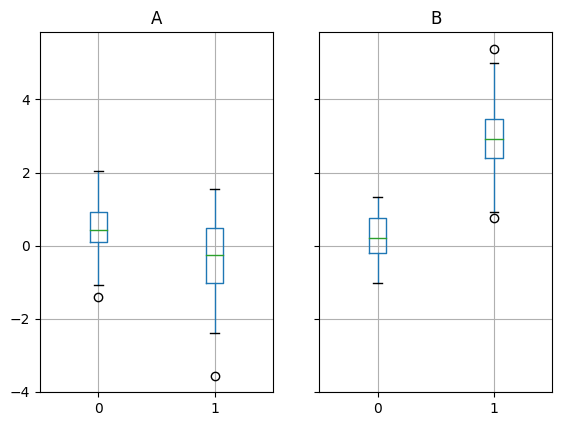

In [381]:
df.groupby("g").boxplot()
#내장함수로 박스플롯 그리기

In [382]:
n = 1000

df = pd.DataFrame(
    {
        "Store": np.random.choice(["Store_1", "Store_2"], n),
        "Product": np.random.choice(["Product_1", "Product_2"], n),
        "Revenue": (np.random.random(n) * 50 + 10).round(2),
        "Quantity": np.random.randint(1, 10, size=n),
    }
)


df.head(2)

,Store,Product,Revenue,Quantity
0,Store_2,Product_1,26.12,1
1,Store_2,Product_1,28.86,1


In [384]:
(
    df.groupby(["Store", "Product"]).
    pipe(lambda grp: grp.Revenue.sum() / grp.Quantity.sum()).
    unstack().
    round()
)

# 값을 적용만 하는 apply와 다르게 pipe는 객체 자체를 함수의 인자로 전달한다.
# 즉, pipe는 groupby객체를 그대로 sum()으로 넘긴다.

Product,Product_1,Product_2
Store,,
Store_1,7.0,7.0
Store_2,6.0,7.0


In [385]:
def mean(groupby):
    return groupby.mean()


df.groupby(["Store", "Product"]).pipe(mean)
#마찬가지로 결과가 즉시 pipe안의 mean으로 들어간다.

Revenue  Quantity
Store   Product                       
Store_1 Product_1  34.622727  5.075758
        Product_2  35.482815  5.029630
Store_2 Product_1  32.972837  5.237589
        Product_2  34.684360  5.224000

In [386]:
dfg = pd.DataFrame({"A": [1, 1, 2, 3, 2], "B": list("aaaba")})

dfg

,A,B
0,1,a
1,1,a
2,2,a
3,3,b
4,2,a


In [388]:
dfg.groupby(["A", [0,0,0,1,0]]).ngroup()

,0
0,0
1,0
2,1
3,2
4,1


In [389]:
df = pd.DataFrame(np.random.randn(10, 2))

df

,0,1
0,-0.793893,0.321153
1,0.342250,1.618906
2,-0.975807,1.918201
3,-0.810847,-1.405919
4,-1.977759,0.461659
5,0.730057,-1.316938
6,-0.751328,0.528290
7,-0.257759,-1.081009
8,0.505895,-1.701948
9,-1.006349,0.020208


In [390]:
df.index // 5

Index([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype='int64')

In [392]:
df.groupby(df.index // 5).std()

,0,1
0,0.823647,1.312912
1,0.760109,0.942941


In [393]:
df = pd.DataFrame(
    {
        "a": [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2],
        "b": [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
        "c": [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        "d": [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
    }
)

def compute_metrics(x):
    result = {"b_sum": x["b"].sum(), "c_mean": x["c"].mean()}
    return pd.Series(result, name="metrics")

#df를 다시 series(딕셔너리)로 되돌리는 함수

result = df.groupby("a").apply(compute_metrics, include_groups = False)
result

metrics,b_sum,c_mean
a,,
0,2.0,0.5
1,2.0,0.5
2,2.0,0.5


In [394]:
result = df.groupby("a").apply(compute_metrics, include_groups = True)
result

<ipython-input-394-63ca3ab37c79>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby("a").apply(compute_metrics, include_groups = True)


metrics,b_sum,c_mean
a,,
0,2.0,0.5
1,2.0,0.5
2,2.0,0.5


In [397]:
result.stack(future_stack = True)
#future_stack은 멀티인덱스의 레벨을 스택하여 새 df를 반환한다. 최신 버전 관련 기능인듯.

a  metrics
0  b_sum      2.0
   c_mean     0.5
1  b_sum      2.0
   c_mean     0.5
2  b_sum      2.0
   c_mean     0.5
dtype: float64